sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


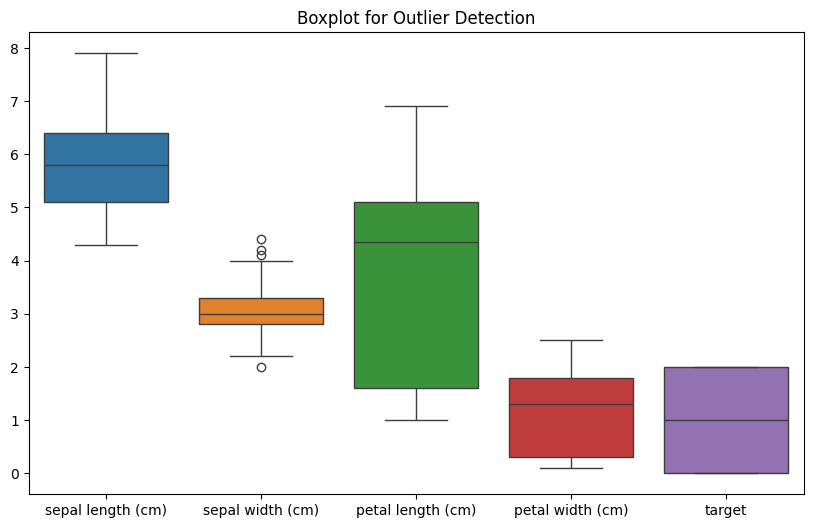

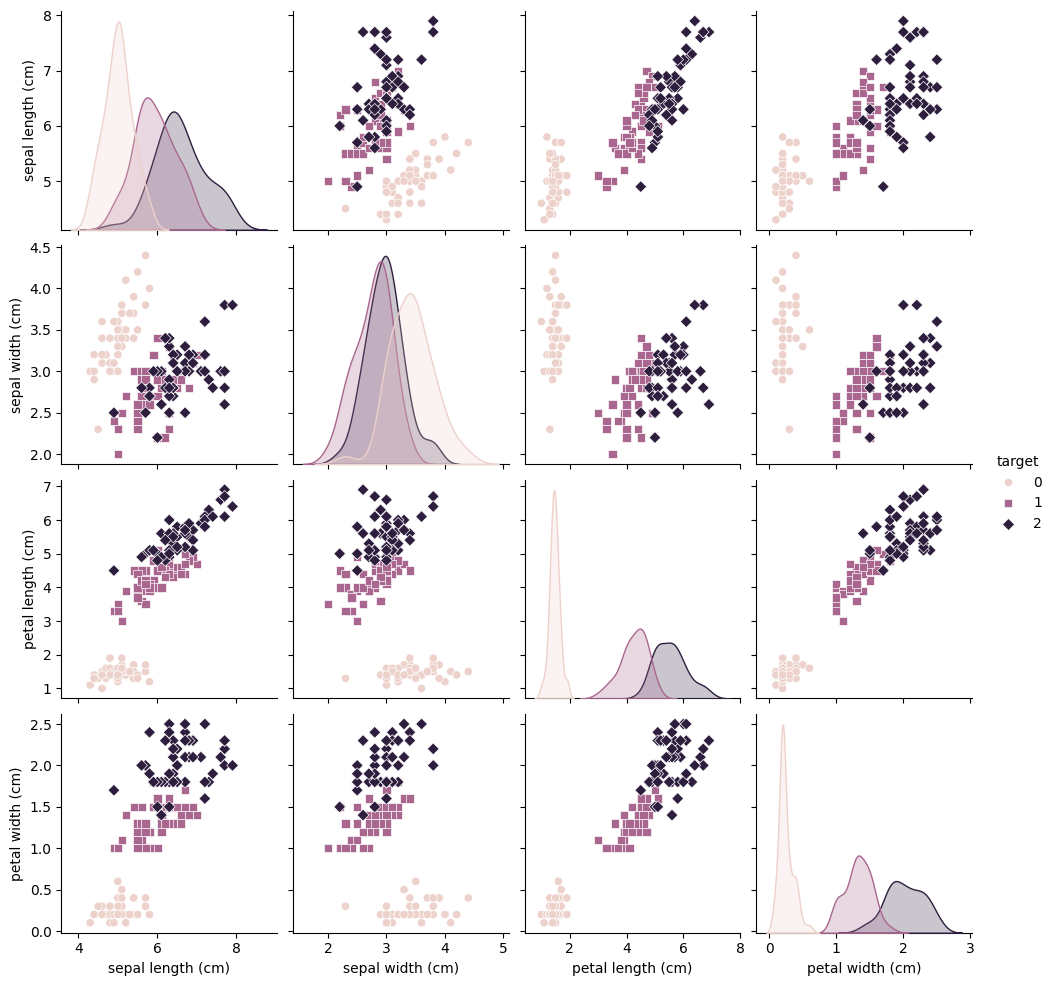

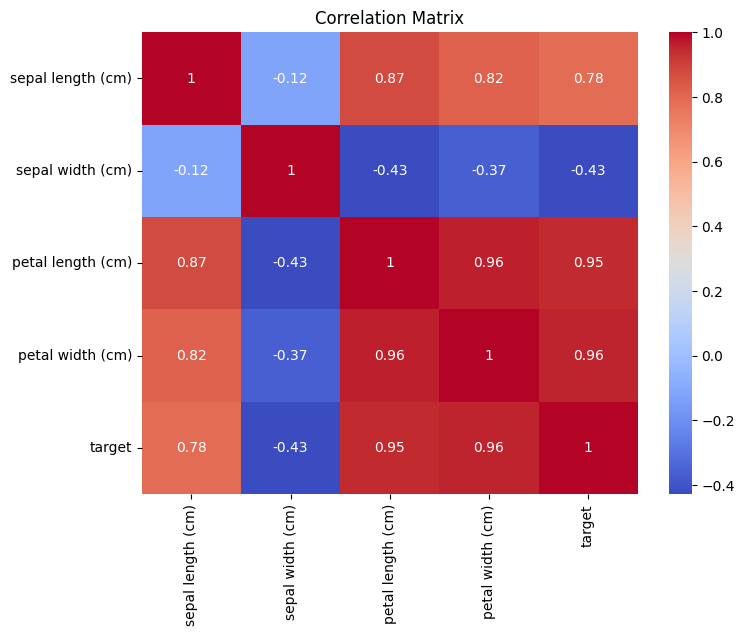

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



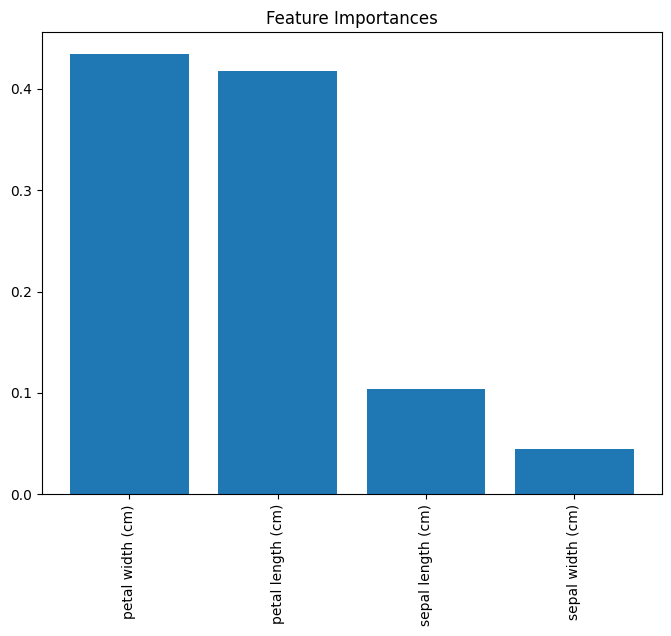

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Data Cleaning: Check for missing values
print(df.isnull().sum())  # No missing values in Iris dataset

# Data Cleaning: Check for outliers using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection")
plt.show()

# EDA: Pairplot of the features colored by species
sns.pairplot(df, hue='target', markers=["o", "s", "D"])
plt.show()

# EDA: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Train-test split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model: Random Forest with hyperparameter tuning using GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Train the model with best parameters
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = best_rf.predict(X_test)

# Confusion Matrix and Accuracy
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

# Feature Importance Visualization
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()


Mean Squared Error: 33.01968270085812
R-squared: 0.646043013554346
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


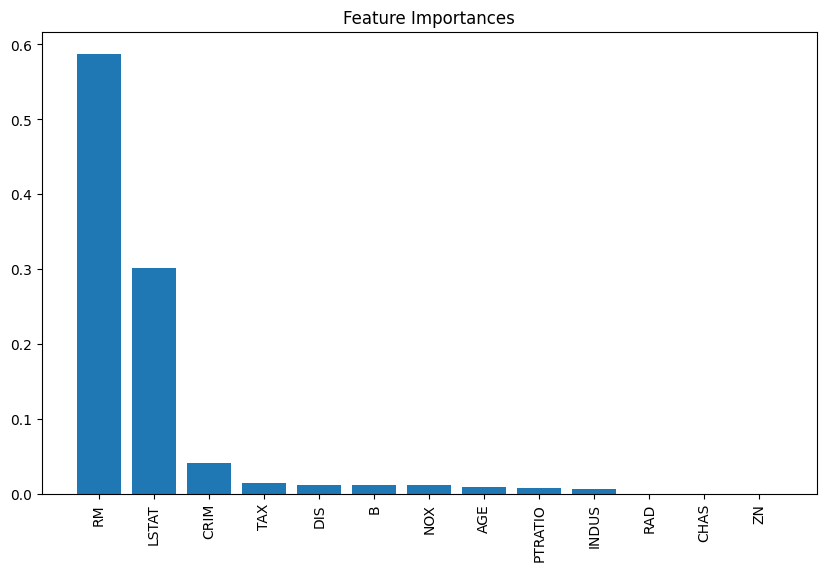

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace the path with your file path)
df = pd.read_csv('HousingData.csv')

# Drop rows with missing values
df_cleaned = df.dropna()

# Split the dataset into features and target variable
X = df_cleaned.drop('MEDV', axis=1)
y = df_cleaned['MEDV']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearch to find the best parameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_dt = grid_search.best_estimator_

# Fit the best model and make predictions
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Best Parameters:", grid_search.best_params_)

# Feature importance visualization
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.show()


Mean Squared Error: 28.87077192825365
R-squared: 0.6905175764205974
Intercept: 32.99322335502795
Coefficients: [-1.12990963e-01  4.49594371e-02  5.75447722e-02  1.18099414e+00
 -1.72522169e+01  4.27138350e+00 -1.99977624e-02 -1.40633199e+00
  2.77671705e-01 -1.68192666e-02 -8.96637094e-01  9.07231436e-03
 -3.64600546e-01]
         Coefficient
CRIM       -0.112991
ZN          0.044959
INDUS       0.057545
CHAS        1.180994
NOX       -17.252217
RM          4.271383
AGE        -0.019998
DIS        -1.406332
RAD         0.277672
TAX        -0.016819
PTRATIO    -0.896637
B           0.009072
LSTAT      -0.364601


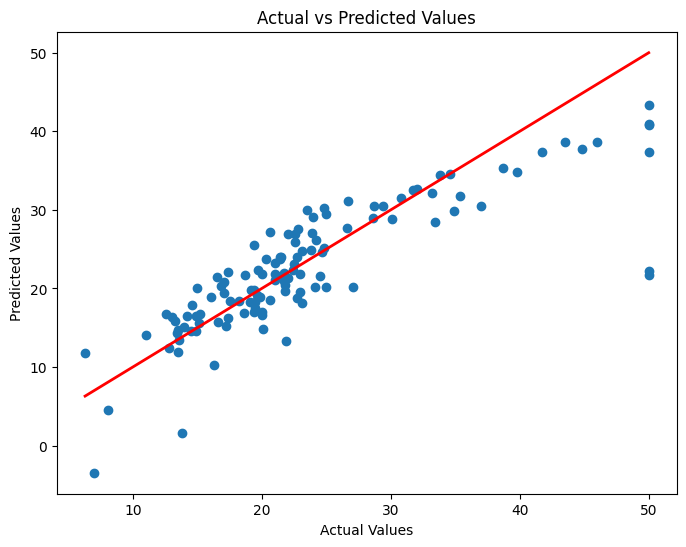

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace the path with your file path)
df = pd.read_csv('HousingData.csv')

# Drop rows with missing values
df_cleaned = df.dropna()

# Split the dataset into features and target variable
X = df_cleaned.drop('MEDV', axis=1)
y = df_cleaned['MEDV']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Print the coefficients and intercept
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

# Feature importance visualization (based on the coefficients)
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Optional: Visualize predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
